In [5]:
## Importing txt file from internet

import pandas as pd

data = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
data

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [6]:
import scipy.stats as stats


# stats f_oneway functions takes the groups as input and returns F and P-value

fvalue, pvalue = stats.f_oneway(data['A'], data['B'], data['C'], data['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [9]:
data_new = pd.melt(data.reset_index(), id_vars = ['index'], value_vars = ['A','B','C','D'])
data_new.columns = ['index', 'treatments', 'value']

model = ols('value ~ C(treatments)', data= data_new).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


Interpretation: The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

In [10]:
## Tukey HSD test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)


m_comp = pairwise_tukeyhsd(endog = data_new['value'], groups = data_new['treatments'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


Above results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.

Test ANOVA assumptions

The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.

In [11]:
import scipy.stats as stats

w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [12]:
import scipy.stats as stats

w, pvalue = stats.bartlett(data['A'], data['B'], data['C'], data['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

Two-way (two factor) ANOVA

In [14]:
import pandas as pd

df = pd.read_csv("https://reneshbedre.github.io//assets/posts/anova/twowayanova.txt", sep = '\t')
df

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


For this experimental design, there are two factors to evaluate, and therefore, two-way ANOVA is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants. If you apply one-way ANOVA here, you can able to evaluate only one factor at a time.

From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

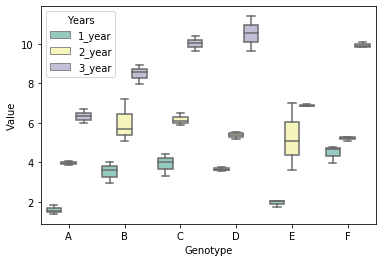

In [17]:
import pandas as pd
import seaborn as sn

# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 

d_melt = pd.melt(df, id_vars = ['Genotype'], value_vars = ['1_year', '2_year', '3_year'])

# replace column names

d_melt.columns = ['Genotype', 'Years', 'Value']

# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups

sn.boxplot(x = 'Genotype', y = 'Value', hue = 'Years', data= d_melt, palette = 'Set3')



In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
# C(Genotype): C(years) represent interaction term

model = ols('Value ~ C(Genotype) + C(Years) + C(Genotype) : C(Years)', data = d_melt).fit()
anova_model = sm.stats.anova_lm(model, typ = 2)
anova_model


,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(Years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(Years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


Interpretation: The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.